#  Final Project – Appl/Artificial Intel Business SCH-MGMT 661 
**Spring 2025 – Group 8**  
**Instructor:** Indika Dissanayake  
**Project Title:** Airbnb Demand & Availability Forecasting – Boston 

---

##  Group Members  
- Shiva Kotagiri
- Sai Vamsee



---

##  Project Overview

This project is part of the final assessment for SCH-MGMT 661 and involves analyzing publicly available Airbnb data to solve a real-world business problem using data analytics techniques.


This notebook includes:
-  Data acquisition and cleaning  
-  Exploratory data analysis (EDA)  
-  Feature engineering  
-  Visualizations across time and location  
-  Insights into booking trends  

The findings in this milestone will inform the development of a predictive model in the next phase.


## Task 1: Pick a City and Define a Problem

### Selected City: Boston 🇺🇸

Boston is a prominent U.S. city with a dynamic short-term rental market driven by its status as a hub for education, healthcare, business, and tourism. The city features a diverse set of Airbnb listings, ranging in price, property type, and location. Seasonal patterns, major events, and academic calendars heavily influence booking behaviors, making Boston an excellent candidate for demand and availability analysis.

---

### Defined Business Problem: Demand & Availability Prediction

The business problem we aim to solve is *forecasting Airbnb demand and availability* in Boston. Using calendar-level booking data alongside listing features, our goal is to predict whether a listing will be booked on any given day.

This analysis can assist:
- *Hosts* in adjusting pricing and availability strategies to maximize occupancy and revenue.
- *Travelers* in identifying high-demand windows and planning bookings in advance.
- *Platform managers* in monitoring demand fluctuations across neighborhoods and time periods.

---

### Why This Problem & City?

- Boston offers *rich and varied listing data*, suitable for robust analysis.
- The calendar dataset includes *daily-level booking status*, allowing for granular demand forecasting.
- The city exhibits *strong seasonal variation* due to tourism, academic cycles, and weather—ideal for time-series modeling.
- Data for Boston is *well-documented, complete, and ready for EDA and predictive modeling*.

This project reflects a *real-world, actionable business challenge* aligned with the interests of Airbnb stakeholders, from individual hosts to platform operators.


## Task 2: Data Acquisition and Cleaning
Load the Dataset


In [248]:
import pandas as pd
listing_df=pd.read_csv("listings.csv")
calendar_df = pd.read_csv("calendar.csv")

Exploring the dataset

In [249]:
listing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.36413,-71.02991,Entire home/apt,162.0,29,26,2024-08-09,0.22,1,196,1,NaN
1,5506,** Fort Hill Inn Private! Minutes to center!**,8229,Terry,NaN,Roxbury,42.32844,-71.09581,Entire home/apt,111.0,3,132,2024-10-19,0.68,11,187,10,STR-490093
2,6695,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex",8229,Terry,NaN,Roxbury,42.32802,-71.09387,Entire home/apt,207.0,3,135,2024-11-11,0.71,11,74,8,STR-491702
3,8789,Curved Glass Studio/1bd facing Park,26988,Anne,NaN,Beacon Hill,42.35867,-71.06307,Entire home/apt,NaN,91,29,2024-05-15,0.22,6,114,1,NaN
4,10811,"Back Bay Apt Studio-3 blocks to Pru center & ""T""",38997,Michelle,NaN,Back Bay,42.35173,-71.08685,Entire home/apt,146.0,91,9,2019-07-22,0.08,12,348,0,NaN


In [250]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [251]:
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3781,2025-03-15,f,$125.00,NaN,29,1125
1,3781,2025-03-16,t,$125.00,NaN,29,1125
2,3781,2025-03-17,t,$125.00,NaN,29,1125
3,3781,2025-03-18,t,$125.00,NaN,29,1125
4,3781,2025-03-19,t,$125.00,NaN,29,1125


We see that adjusted price has alot of nan values so we drop the column

In [252]:
calendar_df.drop(columns=['adjusted_price'], inplace=True)

In [253]:
calendar_df.head()

,listing_id,date,available,price,minimum_nights,maximum_nights
0,3781,2025-03-15,f,$125.00,29,1125
1,3781,2025-03-16,t,$125.00,29,1125
2,3781,2025-03-17,t,$125.00,29,1125
3,3781,2025-03-18,t,$125.00,29,1125
4,3781,2025-03-19,t,$125.00,29,1125


In [254]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680168 entries, 0 to 1680167
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   listing_id      1680168 non-null  int64 
 1   date            1680168 non-null  object
 2   available       1680168 non-null  object
 3   price           1680168 non-null  object
 4   minimum_nights  1680168 non-null  int64 
 5   maximum_nights  1680168 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 76.9+ MB


We convert the price column into float as its data type is set to object 

In [255]:
calendar_df['price'] = (
    calendar_df['price']
    .replace('[\$,]', '', regex=True)
    .astype(float)
)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Shiva\AppData\Local\Temp\ipykernel_21520\953705182.py:3: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)


In [257]:
calendar_df.head()

,listing_id,date,available,price,minimum_nights,maximum_nights
0,3781,2025-03-15,f,125.0,29,1125
1,3781,2025-03-16,t,125.0,29,1125
2,3781,2025-03-17,t,125.0,29,1125
3,3781,2025-03-18,t,125.0,29,1125
4,3781,2025-03-19,t,125.0,29,1125


In [288]:
calendar_df['date'] = pd.to_datetime(calendar_df['date'])


In [259]:
calendar_df.head()

,listing_id,date,available,price,minimum_nights,maximum_nights
0,3781,2025-03-15,f,125.0,29,1125
1,3781,2025-03-16,t,125.0,29,1125
2,3781,2025-03-17,t,125.0,29,1125
3,3781,2025-03-18,t,125.0,29,1125
4,3781,2025-03-19,t,125.0,29,1125


Now lets annote the data to better know the availablity of the listing 

In [ ]:
calendar_df['available'] = calendar_df['available'].map({'t': True, 'f': False})


In [261]:
calendar_df.head()

,listing_id,date,available,price,minimum_nights,maximum_nights
0,3781,2025-03-15,False,125.0,29,1125
1,3781,2025-03-16,True,125.0,29,1125
2,3781,2025-03-17,True,125.0,29,1125
3,3781,2025-03-18,True,125.0,29,1125
4,3781,2025-03-19,True,125.0,29,1125


In [263]:
calendar_df.reset_index(drop=True, inplace=True)

Now lets explore listing dataset


In [265]:
listing_df.drop(columns=['neighbourhood_group'], inplace=True)

In [266]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4608 entries, 0 to 4607
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4608 non-null   int64  
 1   name                            4608 non-null   object 
 2   host_id                         4608 non-null   int64  
 3   host_name                       4607 non-null   object 
 4   neighbourhood                   4608 non-null   object 
 5   latitude                        4608 non-null   float64
 6   longitude                       4608 non-null   float64
 7   room_type                       4608 non-null   object 
 8   price                           3643 non-null   float64
 9   minimum_nights                  4608 non-null   int64  
 10  number_of_reviews               4608 non-null   int64  
 11  last_review                     3425 non-null   object 
 12  reviews_per_month               34

In [267]:
listings_clean = listing_df.copy()

In [268]:
listings_clean = listings_clean.dropna(subset=['price'])

 Fill missing review frequency with 0 and ensure proper data type for modeling

In [269]:
listings_clean['reviews_per_month'] = listings_clean['reviews_per_month'].fillna(0).infer_objects(copy=False)


 We will convert last_review to datetime and fill missing values with a placeholder date

In [270]:
listings_clean['last_review'] = pd.to_datetime(listings_clean['last_review'], errors='coerce')
listings_clean['last_review'] = listings_clean['last_review'].fillna(pd.Timestamp('2000-01-01'))

We will fill missing license and host_name fields with 'Unknown' to retain these entries for analysis

In [271]:
listings_clean['license'] = listings_clean['license'].fillna('Unknown')
listings_clean['host_name'] = listings_clean['host_name'].fillna('Unknown')


 We will ensure both IDs are of integer type before merging calendar and listings data on listing_id


In [272]:
calendar_df['listing_id'] = calendar_df['listing_id'].astype(int)
listings_clean['id'] = listings_clean['id'].astype(int)
calendar_merged = calendar_df.merge(listings_clean, left_on='listing_id', right_on='id')

 We will rename 'price_x' to 'calendar_price' for clarity in distinguishing calendar-based pricing


In [273]:
calendar_merged = calendar_merged.rename(columns={"price_x": "calendar_price"})

In [ ]:
calendar_sample = calendar_merged.sample(n=5000, random_state=42)
calendar_sample['day_of_week'] = calendar_sample['date'].dt.dayofweek
calendar_sample['month'] = calendar_sample['date'].dt.month


 We will select relevant numerical features from the merged sample for exploratory data analysis

In [276]:
eda_df = calendar_sample[['calendar_price', 'minimum_nights_x', 'number_of_reviews',
                          'availability_365', 'reviews_per_month']]

## Task 3: Exploratory Data Analysis (EDA)

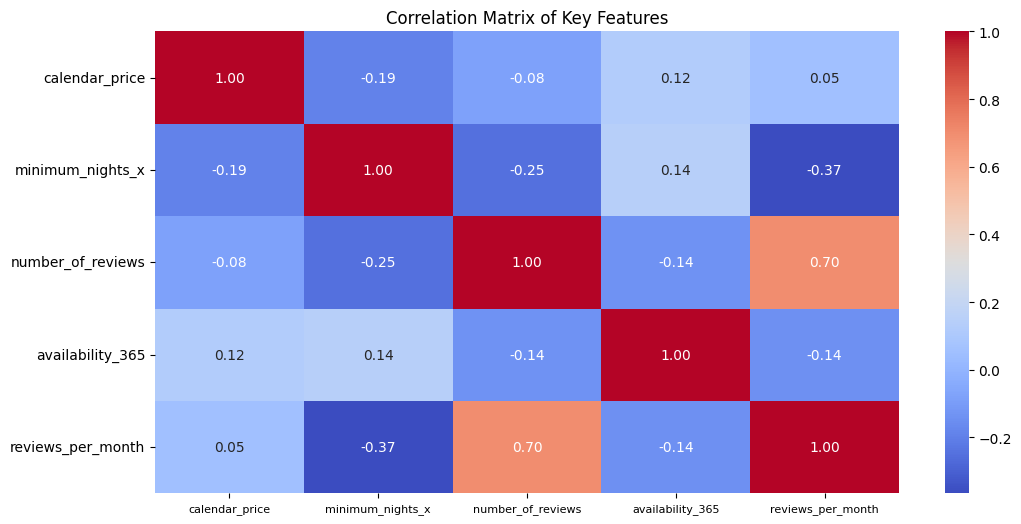

In [289]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(12, 6))
heatmap=sns.heatmap(eda_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 0, fontsize = 8)
plt.title("Correlation Matrix of Key Features")
plt.show()


We will plot histograms to visualize the distribution of each numeric feature and detect skewness or outliers

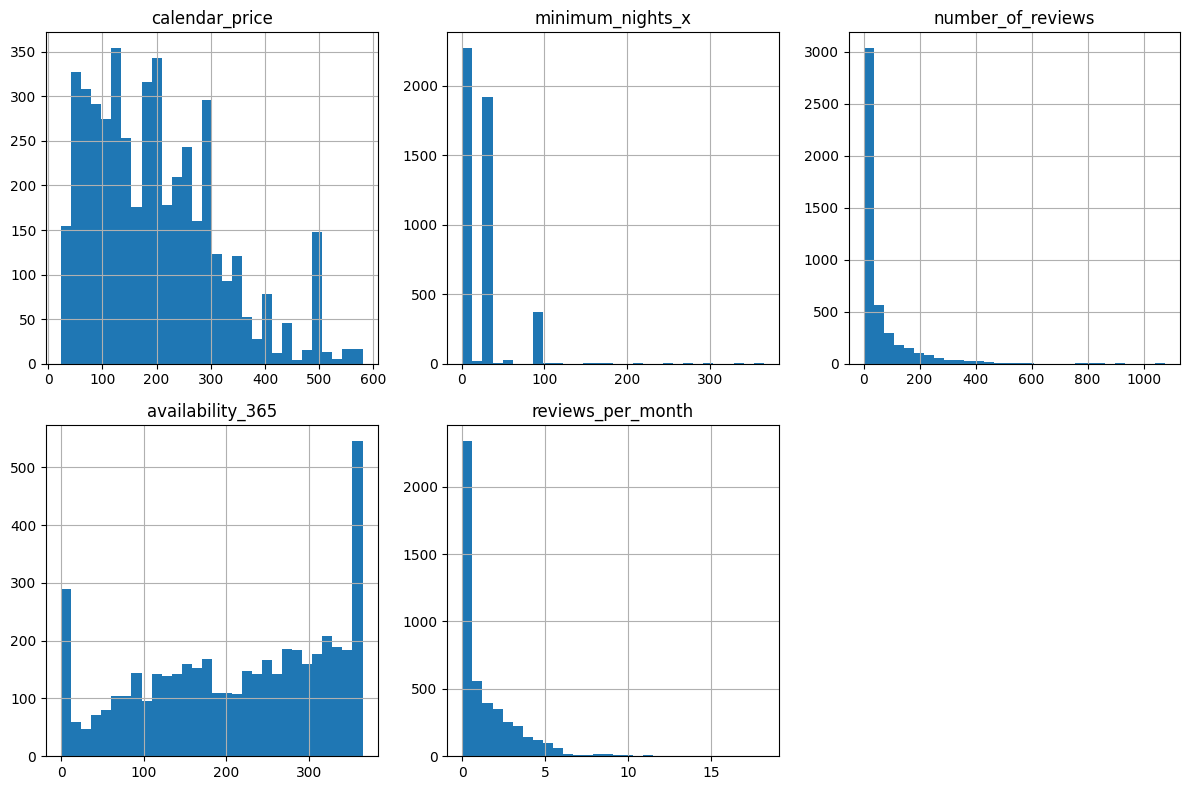

In [290]:
eda_df.hist(bins=30, figsize=(12, 8), layout=(2, 3))
plt.tight_layout()
plt.show()

We see that there is extreme skewness in the calendar price


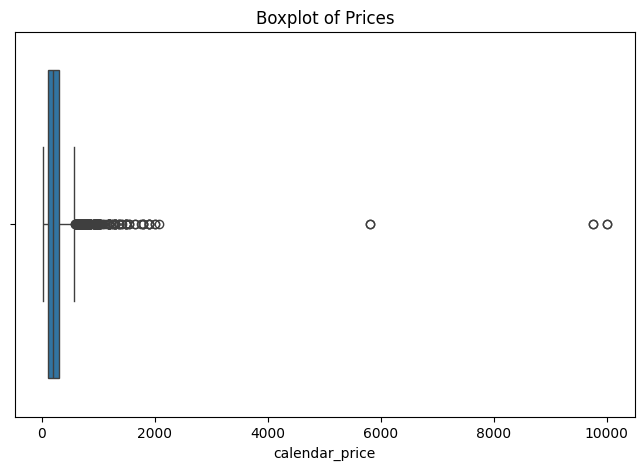

In [280]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=eda_df, x='calendar_price')
plt.title('Boxplot of Prices')
plt.show()

We fix the skewness by introducing interquartile range

In [281]:
Q1 = eda_df['calendar_price'].quantile(0.25)
Q3 = eda_df['calendar_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers in price
eda_df = eda_df[(eda_df['calendar_price'] >= lower_bound) & (eda_df['calendar_price'] <= upper_bound)]

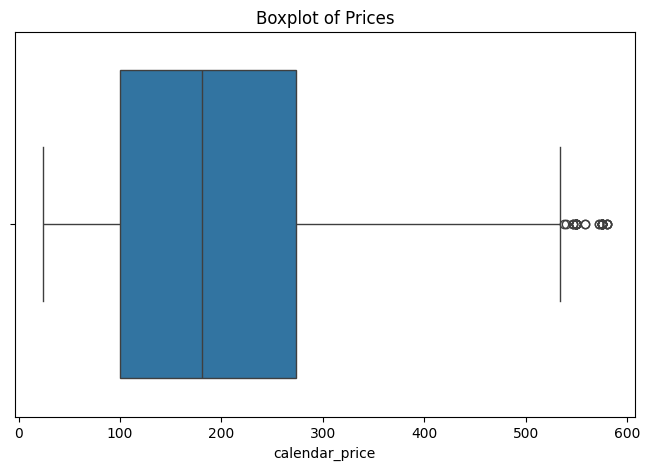

In [282]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=eda_df, x='calendar_price')
plt.title('Boxplot of Prices')
plt.show()

Scatter plot: Price vs Number of Reviews

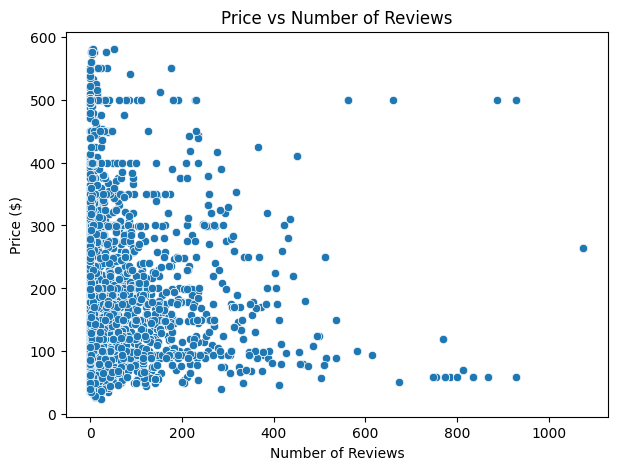

In [ ]:

plt.figure(figsize=(7, 5))
sns.scatterplot(data=eda_df, x='number_of_reviews', y='calendar_price')
plt.title('Price vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price ($)')
plt.show()

We will visualize monthly availability trends using a count plot, replacing numeric month labels with month names for clarity

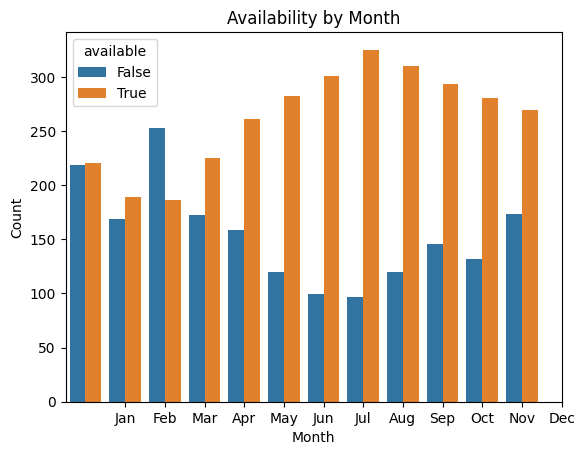

In [285]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.countplot(data=calendar_sample, x='month', hue='available')
plt.title('Availability by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(ticks=range(12), labels=month_names)
plt.xticks(ticks=range(1, 13), labels=month_names)
plt.show()

We use pairplots to better understand the data

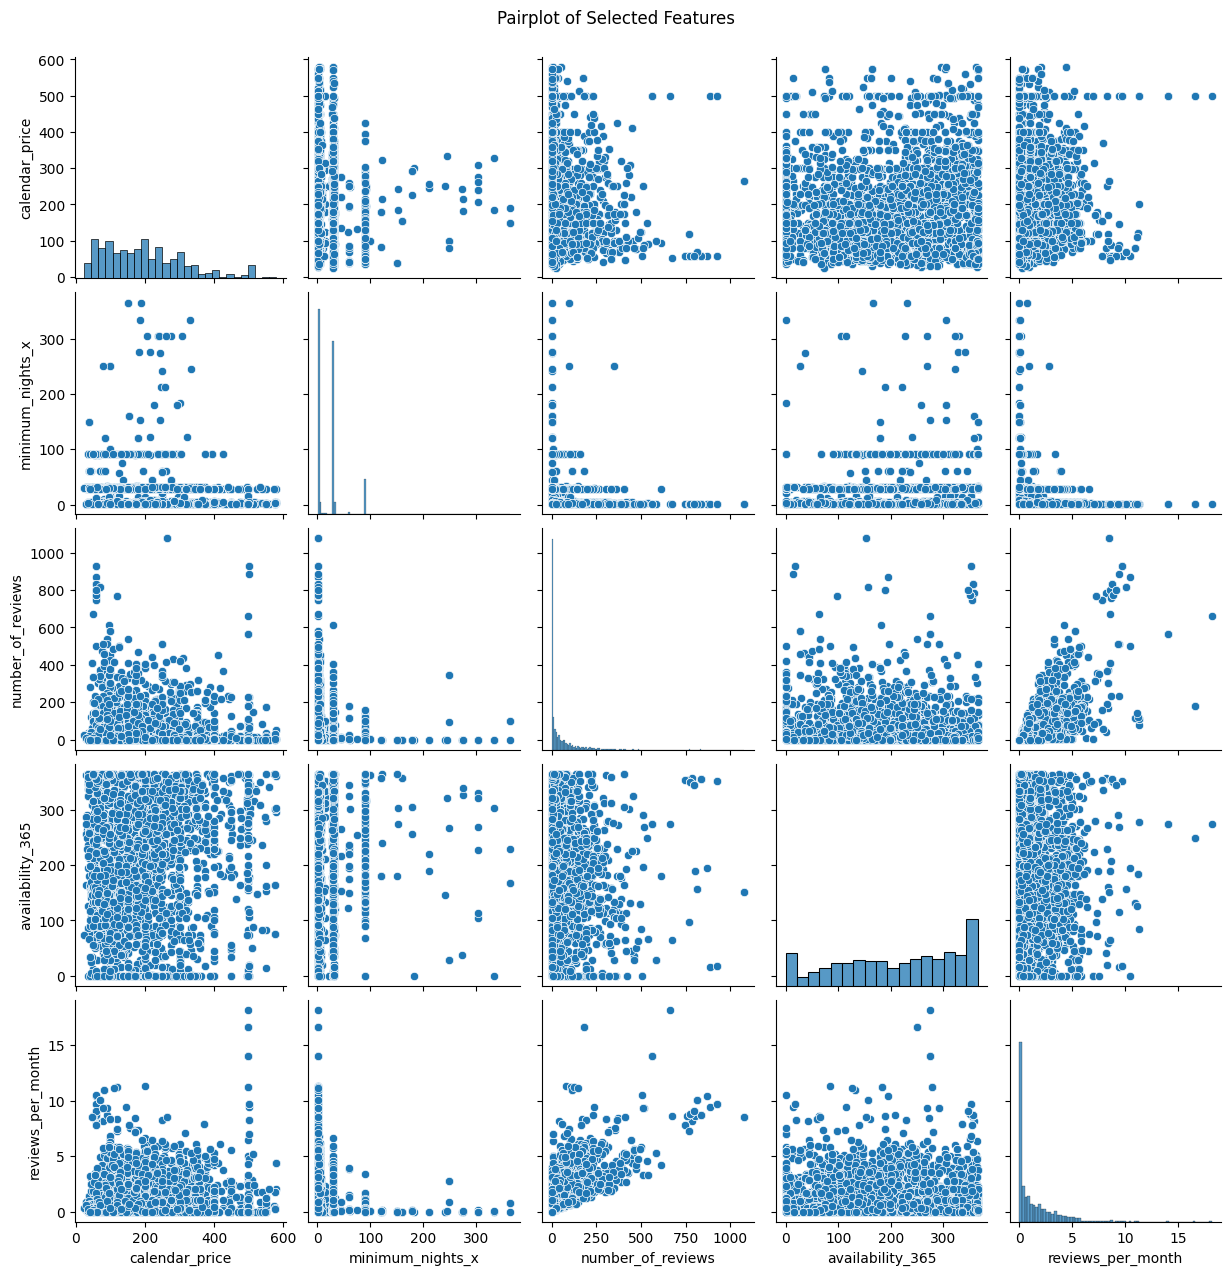

In [286]:
sns.pairplot(eda_df)
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

 We will plot the average calendar price by room type to compare pricing across different types of accommodations

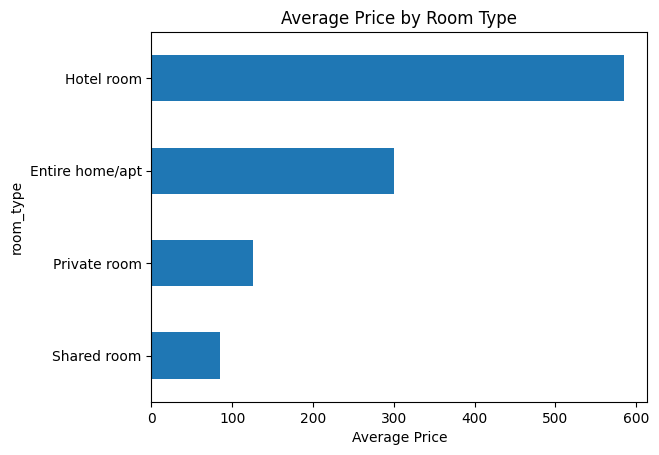

In [287]:
room_prices = calendar_sample.groupby('room_type')['calendar_price'].mean().sort_values()
room_prices.plot(kind='barh')
plt.title('Average Price by Room Type')
plt.xlabel('Average Price')
plt.show()